## Problem Statement :  To build a classification methodology to predict the type of Thyroid a                                            person has ,based on the below features.
* age - Age of the person
* sex - Male or Female
* on_thyroxine - true or false
* on_antithyroid_medication - true or false
* sick - true or false
* pregnant - true or false
* thyroid_surgery - true or false
* I131_treatment - true or false
* query_hypothyroid - true or false
* query_hyperthyroid -true or false
* lithium - true or false
* goitre - true or false
* tumor - true or false
* hypopituitary- true or false
* psych - true or false
* TSH_measured - true or false
* TSH - thyroid stimulating hormone floating value
* T3_measured - true or false
* T3 - triiodothyronine value
* TT4_measured- true or false
* TT4 - Thyroxine value
* T4U_measured- true or false
* T4U - numerical value
* FTI_measured- true or false
* FTI -Free Thyroxine Index
* TBG_measured- true or false
* TBG -Thyroid-Binding Globulin  value
* referral_source - different sources of referals
* Class - different types of thyroid

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [2]:
tdf = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\hypothyroid.csv')

In [3]:
tdf.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [4]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
tdf.shape

(3772, 30)

In [6]:
tdf.isnull().sum().sum()

0

In [7]:
for i in tdf:
    print(i)
    print(tdf[i].value_counts(),'\n')

age
59     95
60     91
70     90
73     81
55     81
       ..
4       1
5       1
455     1
6       1
?       1
Name: age, Length: 94, dtype: int64 

sex
F    2480
M    1142
?     150
Name: sex, dtype: int64 

on_thyroxine
f    3308
t     464
Name: on_thyroxine, dtype: int64 

query_on_thyroxine
f    3722
t      50
Name: query_on_thyroxine, dtype: int64 

on_antithyroid_medication
f    3729
t      43
Name: on_antithyroid_medication, dtype: int64 

sick
f    3625
t     147
Name: sick, dtype: int64 

pregnant
f    3719
t      53
Name: pregnant, dtype: int64 

thyroid_surgery
f    3719
t      53
Name: thyroid_surgery, dtype: int64 

I131_treatment
f    3713
t      59
Name: I131_treatment, dtype: int64 

query_hypothyroid
f    3538
t     234
Name: query_hypothyroid, dtype: int64 

query_hyperthyroid
f    3535
t     237
Name: query_hyperthyroid, dtype: int64 

lithium
f    3754
t      18
Name: lithium, dtype: int64 

goitre
f    3738
t      34
Name: goitre, dtype: int64 

tumor
f    3676


In [8]:
tdf.index[tdf.Class == 'secondary_hypothyroid']

Int64Index([1505, 2735], dtype='int64')

In [9]:
tdf.drop([1505,2735], axis=0, inplace=True)

In [10]:
for i in tdf.columns:
    count = tdf[i][tdf[i]=='?'].count()
    if count!=0:
        print(i+':',tdf[i][tdf[i]=='?'].count())

age: 1
sex: 150
TSH: 369
T3: 769
TT4: 231
T4U: 386
FTI: 384
TBG: 3770


In [11]:
del tdf['TBG']

In [12]:
tdf.head(20)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,SVI,negative
5,18,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.03,f,?,t,183,t,1.3,t,141,f,other,negative
6,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,72,t,0.92,t,78,f,other,negative
7,80,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,0.6,t,80,t,0.7,t,115,f,SVI,negative
8,66,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,t,0.6,t,2.2,t,123,t,0.93,t,132,f,SVI,negative
9,68,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.4,t,1.6,t,83,t,0.89,t,93,f,SVI,negative


#### As we can see some columns are just a represantation of next column.
#### i.e., if the main column value is present or not is represented in measured column,  we can drop measured columns 

In [13]:
tdf.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'Class'],
      dtype='object')

In [14]:
tdf.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],1,inplace=True)

In [15]:
for i in tdf.columns:
    count = tdf[i][tdf[i]=='?'].count()
    if count!=0:
        tdf[i] = tdf[i].replace('?',np.nan)

In [16]:
tdf['age'][tdf['age']=='?'].count()

0

In [17]:
tdf.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          386
FTI                          384
referral_source                0
Class                          0
dtype: int64

In [18]:
tdf.dropna(inplace=True)

In [19]:
tdf['age'] =tdf.age.astype('int64')

In [20]:
tdf['TSH'] =tdf.TSH.astype('float32')

In [21]:
tdf['T3'] =tdf.T3.astype('float32')

In [22]:
tdf['TT4'] =tdf.TT4.astype('float32')

In [23]:
tdf['T4U'] =tdf.T4U.astype('float32')

In [24]:
tdf['FTI'] =tdf.FTI.astype('float32')

In [25]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2642 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2642 non-null   int64  
 1   sex                        2642 non-null   object 
 2   on_thyroxine               2642 non-null   object 
 3   query_on_thyroxine         2642 non-null   object 
 4   on_antithyroid_medication  2642 non-null   object 
 5   sick                       2642 non-null   object 
 6   pregnant                   2642 non-null   object 
 7   thyroid_surgery            2642 non-null   object 
 8   I131_treatment             2642 non-null   object 
 9   query_hypothyroid          2642 non-null   object 
 10  query_hyperthyroid         2642 non-null   object 
 11  lithium                    2642 non-null   object 
 12  goitre                     2642 non-null   object 
 13  tumor                      2642 non-null   objec

In [26]:
tdf.Class.value_counts()

negative                   2427
compensated_hypothyroid     136
primary_hypothyroid          79
Name: Class, dtype: int64

In [27]:
categorical = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','referral_source']

In [28]:
continuous = ['age','TSH','T3','TT4','T4U','FTI']

age:
count    2642.000000
mean       53.084406
std        20.371355
min         1.000000
25%        37.000000
50%        55.000000
75%        69.000000
max       455.000000
Name: age, dtype: float64


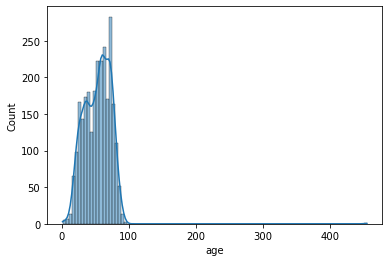

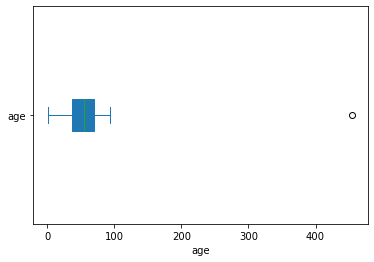

iqr 32.0
left_lim -11.0
right_lim 117.0
No. of Outliers 1
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'right
by what number do you want to replace55


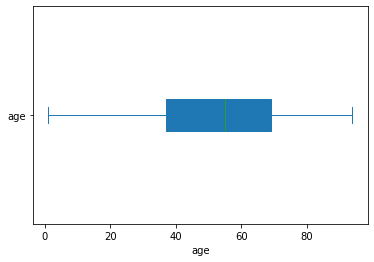

TSH:
count    2642.000000
mean        5.036139
std        23.979387
min         0.005000
25%         0.500000
50%         1.300000
75%         2.575000
max       530.000000
Name: TSH, dtype: float64


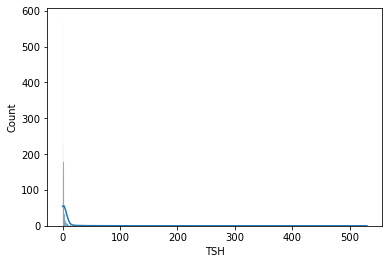

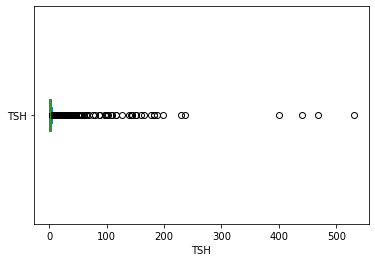

iqr 2.0749999284744263
left_lim -2.6124998927116394
right_lim 5.687499821186066
No. of Outliers 282
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no
T3:
count    2642.000000
mean        2.001455
std         0.823820
min         0.050000
25%         1.500000
50%         2.000000
75%         2.300000
max        10.600000
Name: T3, dtype: float64


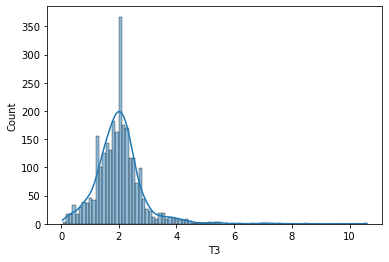

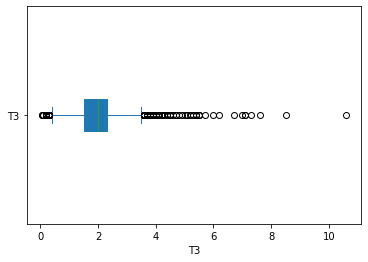

iqr 0.7999999523162842
left_lim 0.30000007152557373
right_lim 3.4999998807907104
No. of Outliers 145
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no
TT4:
count    2642.000000
mean      107.881340
std        35.448006
min         2.000000
25%        88.000000
50%       103.000000
75%       124.000000
max       430.000000
Name: TT4, dtype: float64


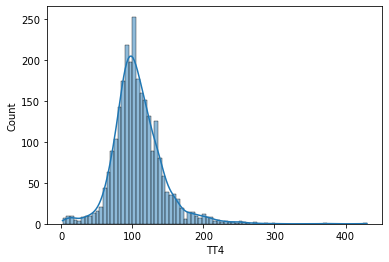

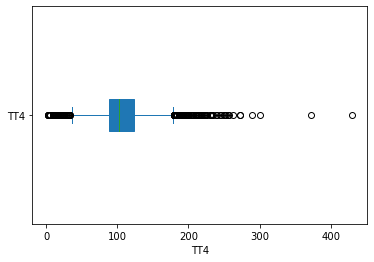

iqr 36.0
left_lim 34.0
right_lim 178.0
No. of Outliers 151
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no
T4U:
count    2642.000000
mean        0.995690
std         0.196471
min         0.250000
25%         0.870000
50%         0.980000
75%         1.090000
max         2.120000
Name: T4U, dtype: float64


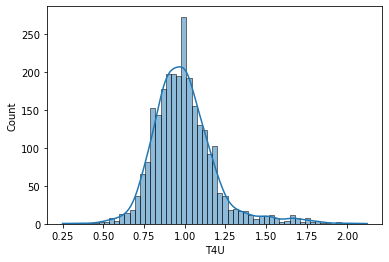

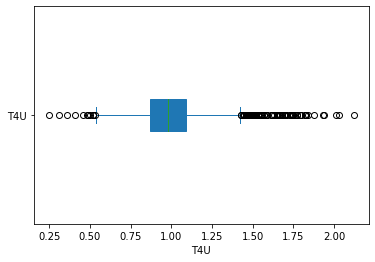

iqr 0.2200000286102295
left_lim 0.5399999618530273
right_lim 1.4200000762939453
No. of Outliers 108
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no
FTI:
count    2642.000000
mean      109.456886
std        32.460369
min         2.000000
25%        93.000000
50%       107.000000
75%       124.000000
max       395.000000
Name: FTI, dtype: float64


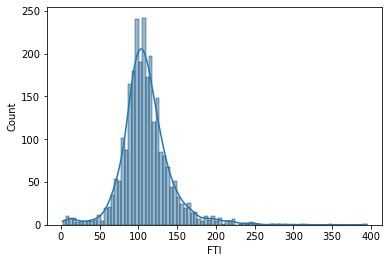

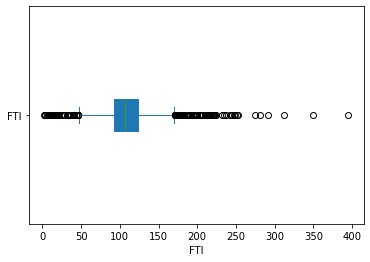

iqr 31.0
left_lim 46.5
right_lim 170.5
No. of Outliers 161
if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'no


In [29]:
for i in continuous:
    print(i+":")
    print(tdf[i].describe())
    plt.figure()
    sns.histplot(x = tdf[i], kde=True)
    plt.xlabel(i)
    plt.show()
    plt.figure()
    tdf[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr= tdf[i].quantile(0.75)-tdf[i].quantile(0.25)
    right_lim=tdf[i].quantile(0.75)+1.5*iqr
    left_lim=tdf[i].quantile(0.25)-1.5*iqr
    print('iqr', iqr)
    print('left_lim', left_lim)
    print('right_lim', right_lim)
    print('No. of Outliers', len(tdf[i][(tdf[i]<left_lim)|(tdf[i]>right_lim)]))
    
    a=input("if left outlier type 'left' else 'right' else 'both' if no outliers then type 'no'")
    a=a.lower()
    if a=='left':
        lo=int(input('by what number do you want to replace'))
        tdf[i]=[lo if val<left_lim else val for val in tdf[i]]
    elif a=='right':
        ro=int(input('by what number do you want to replace'))
        tdf[i]=[ro if val>right_lim else val for val in tdf[i]]
    elif a=='both':
        lo=int(input('by what number do you want to replace left outliers'))
        ro=int(input('by what number do you want to replace right outliers'))
        tdf[i]=[ro if val>right_lim else val for val in tdf[i]]
        tdf[i]=[lo if val<left_lim else val for val in tdf[i]]
    elif a=='no':
        pass
    if a=='left' or a=='right' or a=='both':
        plt.figure()
        tdf[i].plot.box(vert=False,patch_artist=True)
        plt.xlabel(i)
        plt.show()

In [30]:
log_TSH = np.log(tdf.TSH)

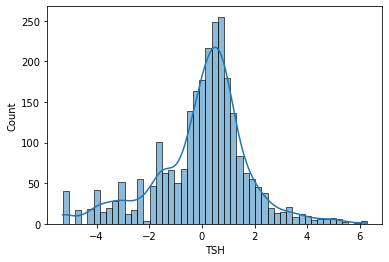

In [31]:
sns.histplot(x = log_TSH, kde=True)
plt.show()

<AxesSubplot:>

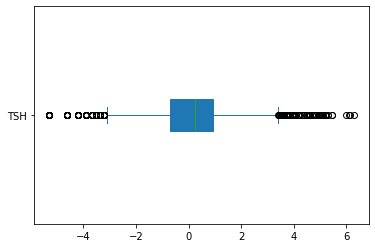

In [32]:
log_TSH.plot.box(vert=False,patch_artist=True)

age:
                          count       mean        std   min   25%   50%   75%  \
Class                                                                           
compensated_hypothyroid   136.0  54.176471  17.065834   7.0  41.5  59.0  68.0   
negative                 2427.0  52.913061  18.978865   1.0  37.0  55.0  69.0   
primary_hypothyroid        79.0  51.405063  16.349170  15.0  38.5  52.0  63.0   

                          max  
Class                          
compensated_hypothyroid  85.0  
negative                 94.0  
primary_hypothyroid      84.0  


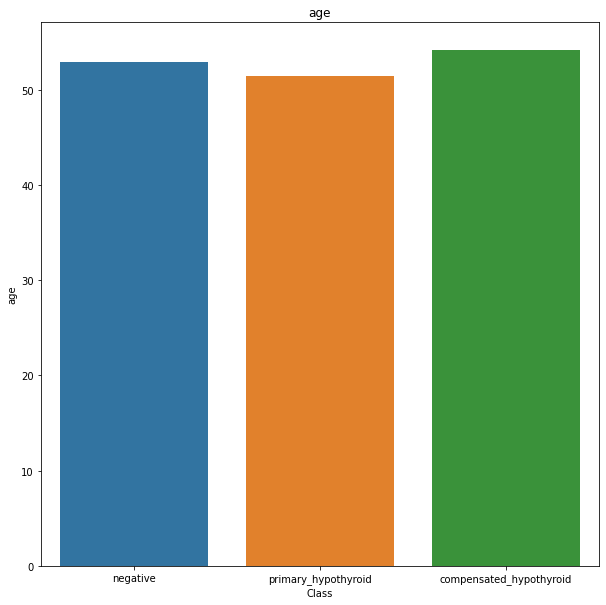

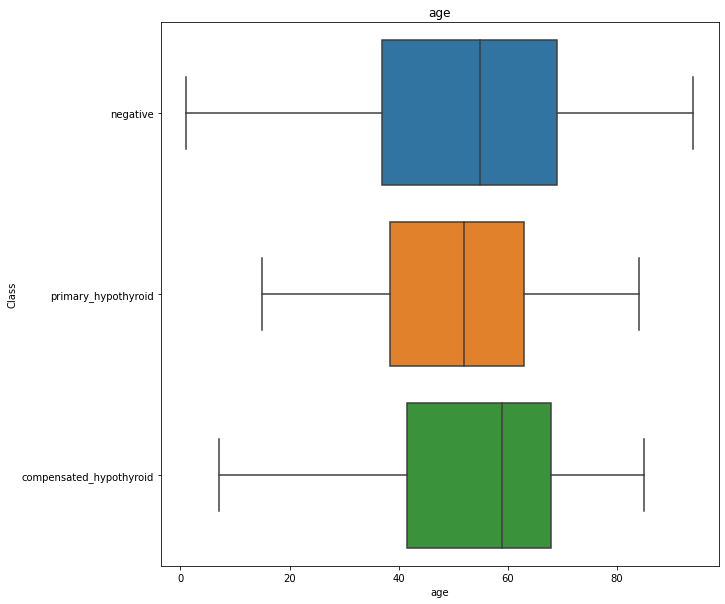

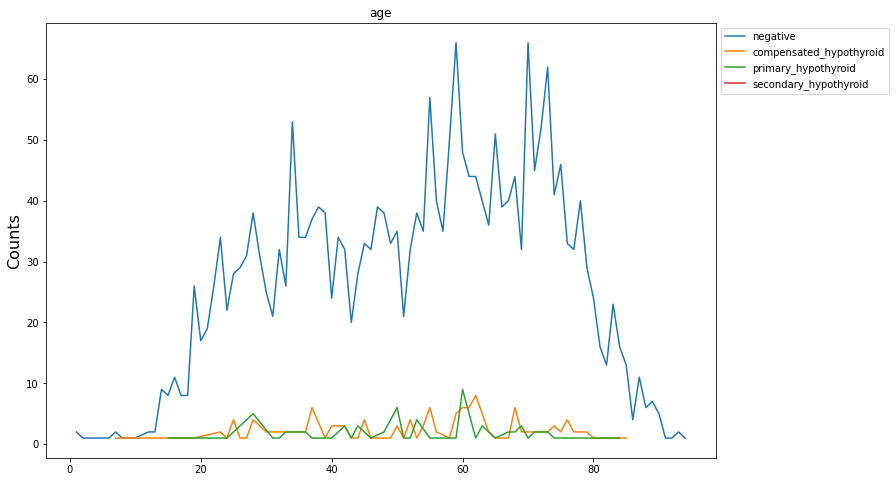

age  p-value  0.5718512659994945  Bad Predictor. Avg of this feature is same for across all categories of Thyroid
TSH:
                          count       mean         std    min   25%    50%  \
Class                                                                        
compensated_hypothyroid   136.0  13.319116   13.754018  6.100   7.5   9.35   
negative                 2427.0   1.819730    4.796112  0.005   0.4   1.20   
primary_hypothyroid        79.0  89.589882  103.652863  6.200  27.0  51.00   

                            75%    max  
Class                                   
compensated_hypothyroid   13.25  143.0  
negative                   2.20  145.0  
primary_hypothyroid      108.50  530.0  


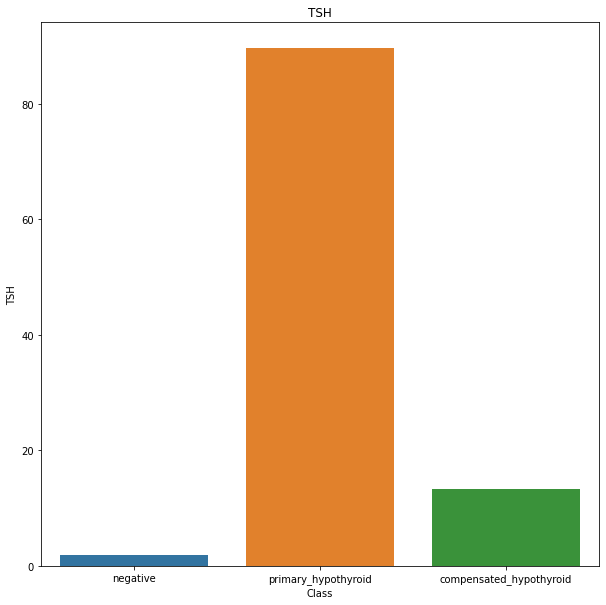

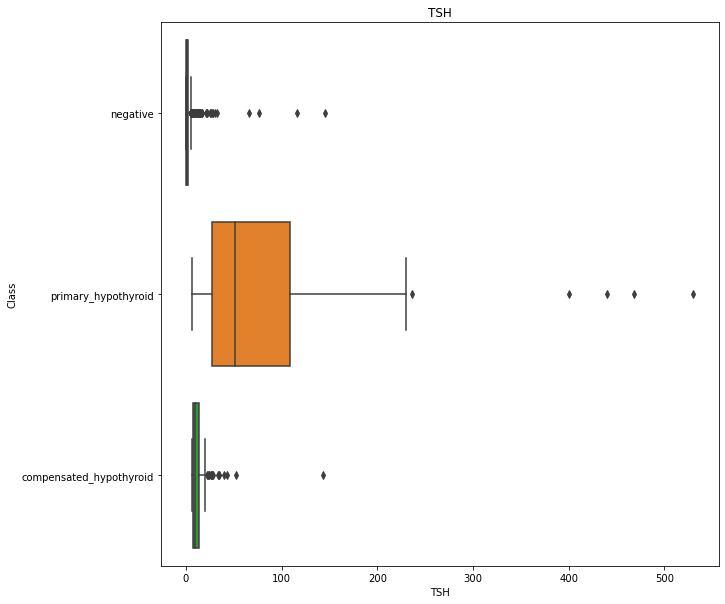

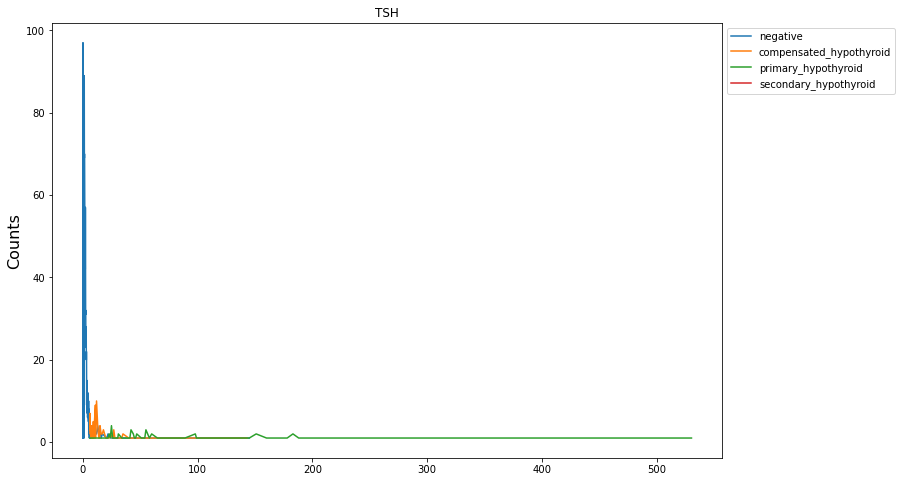

TSH  p-value  2.55989418669648e-288  Good Predictor. Avg of this feature is not same for across all categories of Thyroid
TSH:
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
         group1                group2       meandiff p-adj  lower    upper  reject
----------------------------------------------------------------------------------
compensated_hypothyroid            negative -11.4994   0.0 -15.3563 -7.6424   True
compensated_hypothyroid primary_hypothyroid  76.2708   0.0  70.0791 82.4624   True
               negative primary_hypothyroid  87.7701   0.0  82.7662 92.7741   True
----------------------------------------------------------------------------------
T3:
                          count      mean       std   min  25%  50%  75%   max
Class                                                                         
compensated_hypothyroid   136.0  1.744117  0.678753  0.30  1.3  1.7  2.2   4.1
negative                 2427.0  2.049008  0.811931

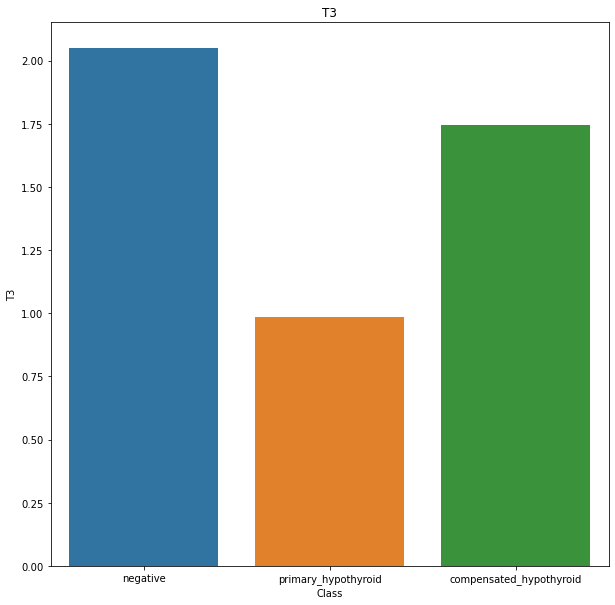

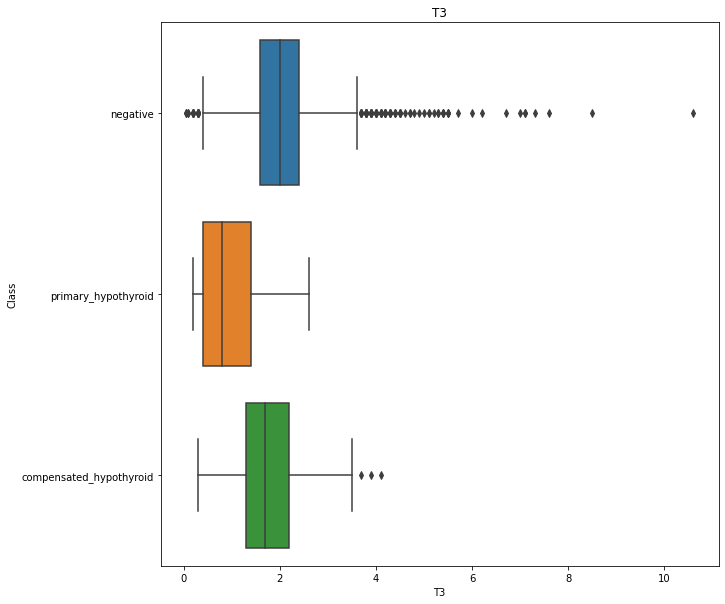

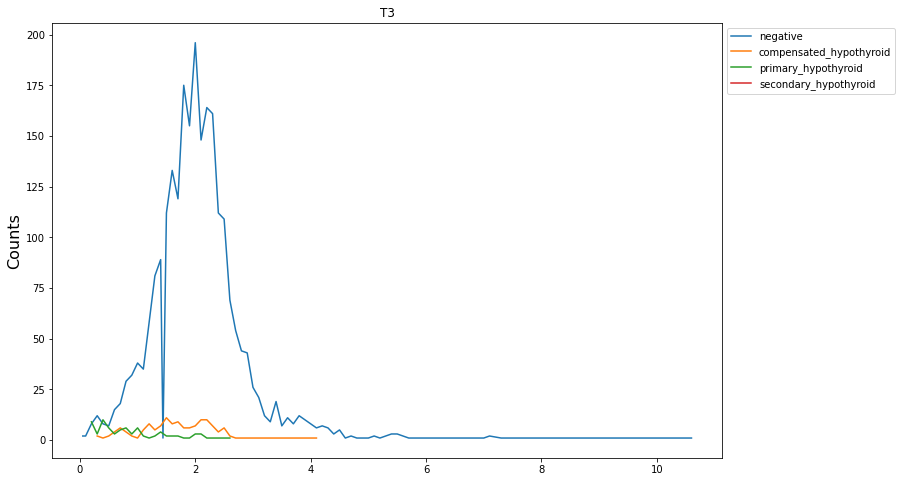

T3  p-value  2.1734899055625393e-32  Good Predictor. Avg of this feature is not same for across all categories of Thyroid
T3:
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
         group1                group2       meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------------------
compensated_hypothyroid            negative   0.3049   0.0  0.1392  0.4705   True
compensated_hypothyroid primary_hypothyroid  -0.7606   0.0 -1.0265 -0.4946   True
               negative primary_hypothyroid  -1.0655   0.0 -1.2804 -0.8505   True
---------------------------------------------------------------------------------
TT4:
                          count        mean        std   min   25%    50%  \
Class                                                                       
compensated_hypothyroid   136.0   91.352943  22.206282  44.0  73.0   88.0   
negative                 2427.0  111.220024  33.474918  19.0  90

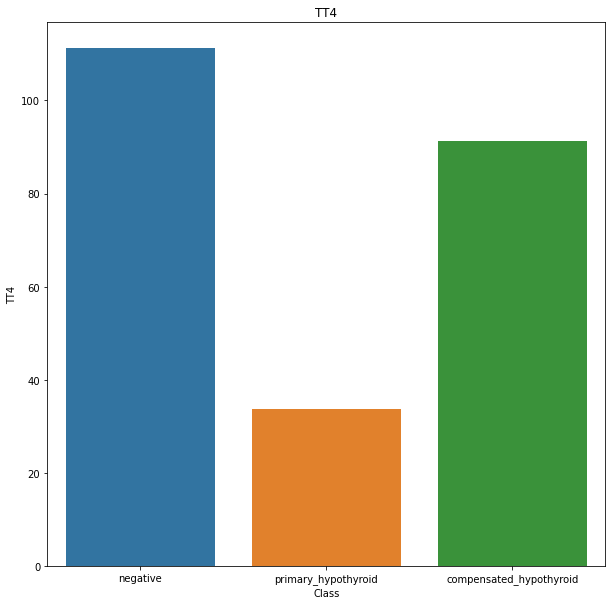

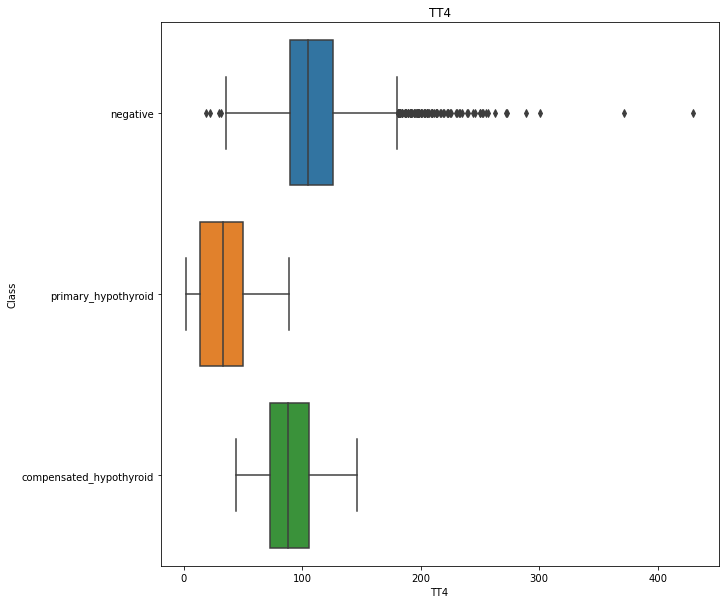

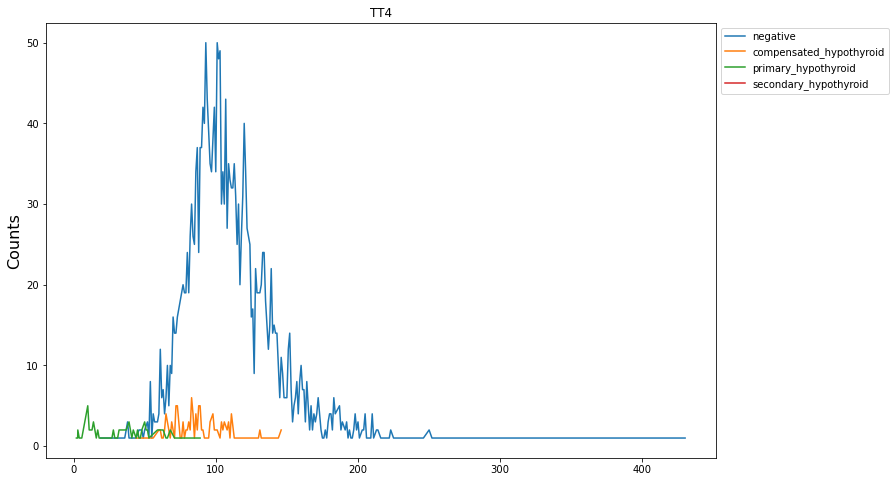

TT4  p-value  6.193500628652645e-94  Good Predictor. Avg of this feature is not same for across all categories of Thyroid
TT4:
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
         group1                group2       meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------------------------
compensated_hypothyroid            negative  19.8671   0.0  13.1116  26.6225   True
compensated_hypothyroid primary_hypothyroid -57.5871   0.0 -68.4319 -46.7423   True
               negative primary_hypothyroid -77.4542   0.0 -86.2187 -68.6897   True
-----------------------------------------------------------------------------------
T4U:
                          count      mean       std   min     25%   50%  \
Class                                                                     
compensated_hypothyroid   136.0  1.000588  0.188203  0.56  0.8775  1.00   
negative                 2427.0  0.994324  0.197202  0.

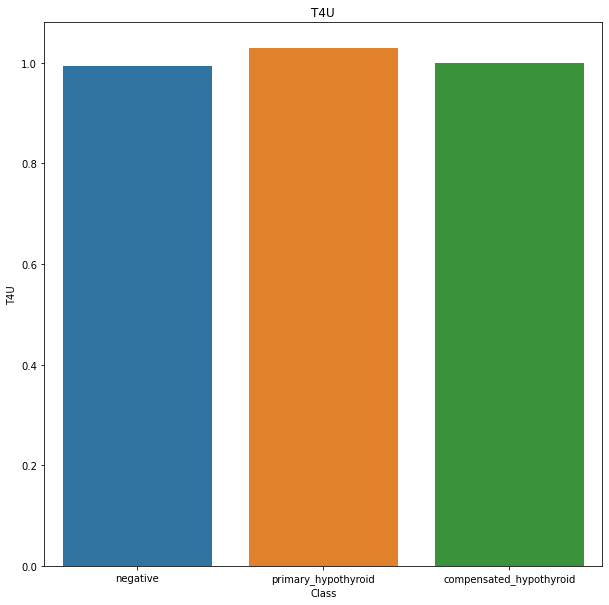

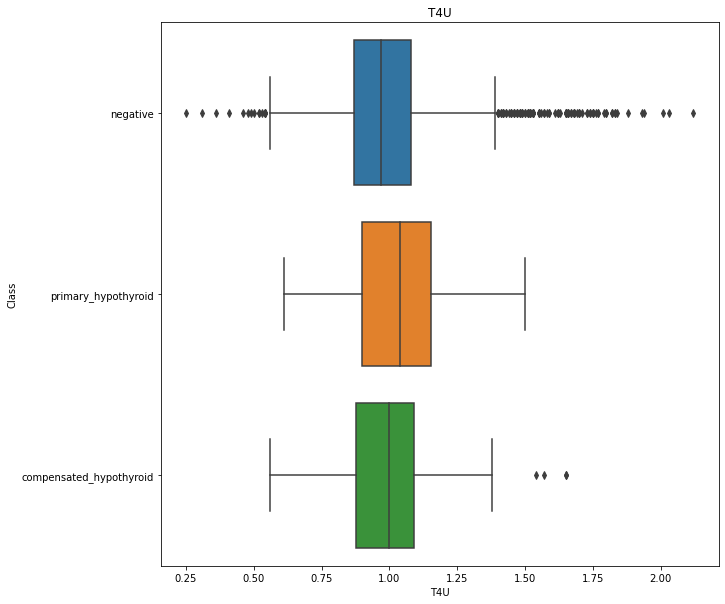

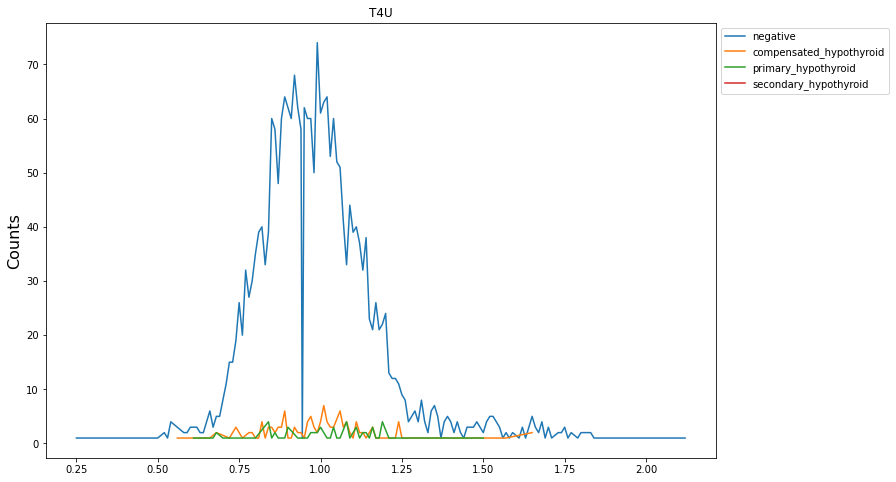

T4U  p-value  0.28580678244408736  Bad Predictor. Avg of this feature is same for across all categories of Thyroid
FTI:
                          count        mean        std   min   25%    50%  \
Class                                                                       
compensated_hypothyroid   136.0   92.000000  18.553625  65.0  77.0   91.0   
negative                 2427.0  112.902351  29.972507  17.0  95.0  108.0   
primary_hypothyroid        79.0   33.659496  20.493860   2.0  13.5   36.0   

                            75%    max  
Class                                   
compensated_hypothyroid  104.25  153.0  
negative                 125.00  395.0  
primary_hypothyroid       51.00   64.0  


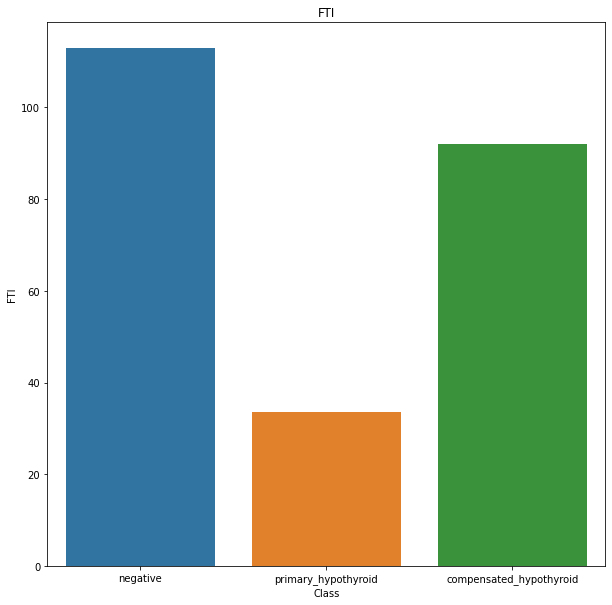

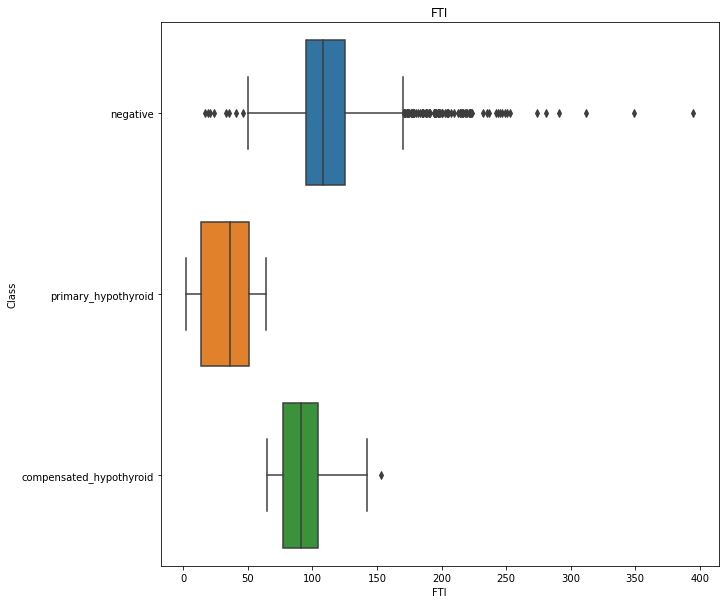

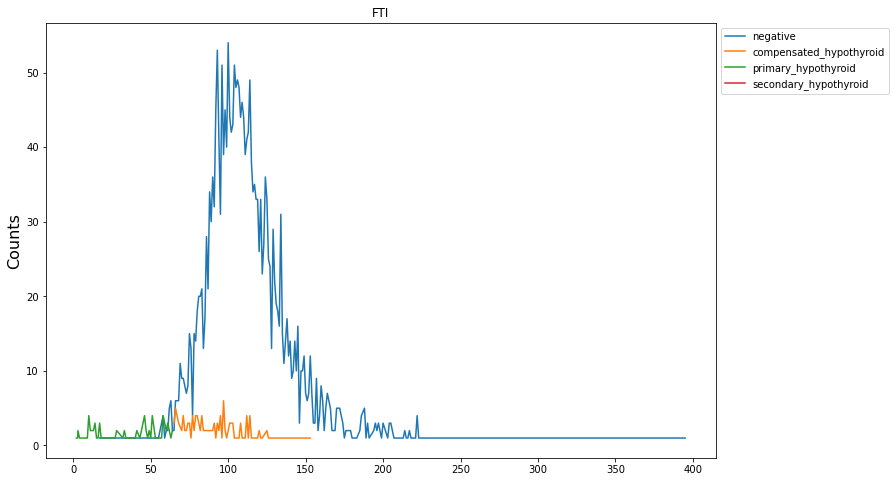

FTI  p-value  2.5856668573577332e-120  Good Predictor. Avg of this feature is not same for across all categories of Thyroid
FTI:
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
         group1                group2       meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------------------------
compensated_hypothyroid            negative  20.9023   0.0   14.857  26.9477   True
compensated_hypothyroid primary_hypothyroid -58.3405   0.0 -68.0453 -48.6357   True
               negative primary_hypothyroid -79.2429   0.0  -87.086 -71.3997   True
-----------------------------------------------------------------------------------


In [33]:
for column in continuous:
    print(column+':')
    print(tdf[column].groupby(tdf.Class).describe())
    plt.figure(figsize=(10,10))
    sns.barplot(y=tdf[column], x=tdf.Class, ci=False)
    plt.title(column)
    plt.show()
    plt.figure(figsize=(10,10))
    sns.boxplot(x=tdf[column], y=tdf['Class'])
    plt.title(column)
    plt.show()
    plt.figure(figsize=(12,8))
    plt.plot(tdf['Class'][tdf.Class=='negative'].groupby(tdf[column]).count())
    plt.plot(tdf['Class'][tdf.Class=='compensated_hypothyroid'].groupby(tdf[column]).count())
    plt.plot(tdf['Class'][tdf.Class=='primary_hypothyroid'].groupby(tdf[column]).count())
    plt.plot(tdf['Class'][tdf.Class=='secondary_hypothyroid'].groupby(tdf[column]).count())
    plt.ylabel('Counts', size=16)
    plt.title(column)
    plt.legend(labels = ('negative', 'compensated_hypothyroid', 'primary_hypothyroid', 'secondary_hypothyroid'),
           bbox_to_anchor=(1, 1), loc=2)
    plt.show()
    model = ols('tdf[column]~Class', data=tdf).fit()
    aov_table = sm.stats.anova_lm(model)
    #print(aov_table)
    p = aov_table['PR(>F)'][0]
    if p>0.05:
        print(column,"","p-value","",p," Bad Predictor. Avg of this feature is same for across all categories of Thyroid")
    else:
        print(column,"","p-value","",p," Good Predictor. Avg of this feature is not same for across all categories of Thyroid")
        print(column + ":")
        tukey=pairwise_tukeyhsd(tdf[column], tdf['Class'], alpha=0.05)
        print(tukey)

In [34]:
# Average age of people getting tested for thyroid is between 50-60. We see extreme outliers for negative class which is illogical. Overall
# Overall we can see distribution of all class in the similar range. No. people getting tested has negative outcome.

# We see significantly high TSH for primary_hypothyroid, but we see some abnormal high TSH for Primary Hypothyroid

# T3 value is high for primary hypothyroid and negative is high. Most of the people with negative thyroid have score around 2-3

# # Distribution of data on TT4 is from 0 to 200. Primary hypothyroid have 0 to 50 score. Most People with negative thyroid having
# having score around 100. People with compensated hypothyroid is having 70 to 120 with peak around 80. Negative Group and Compensated
# hypothyroid group is having higher TT4 Score

# Distribution follows similar pattern for all the group. Most of the people are having T4U Score around 1, irrespective of the group

# Compensated Hypothyroid and negative thyroid people is having higher FTI score with a peaf around 100. Primary
# Hypothyroid group is having lower FTI score ranging around 0 to 60.

In [35]:
tdf.drop(['age','T4U'], axis=1, inplace=True)

In [36]:
tdf_dummies_corr = pd.get_dummies(tdf[['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','referral_source','Class']])

<AxesSubplot:>

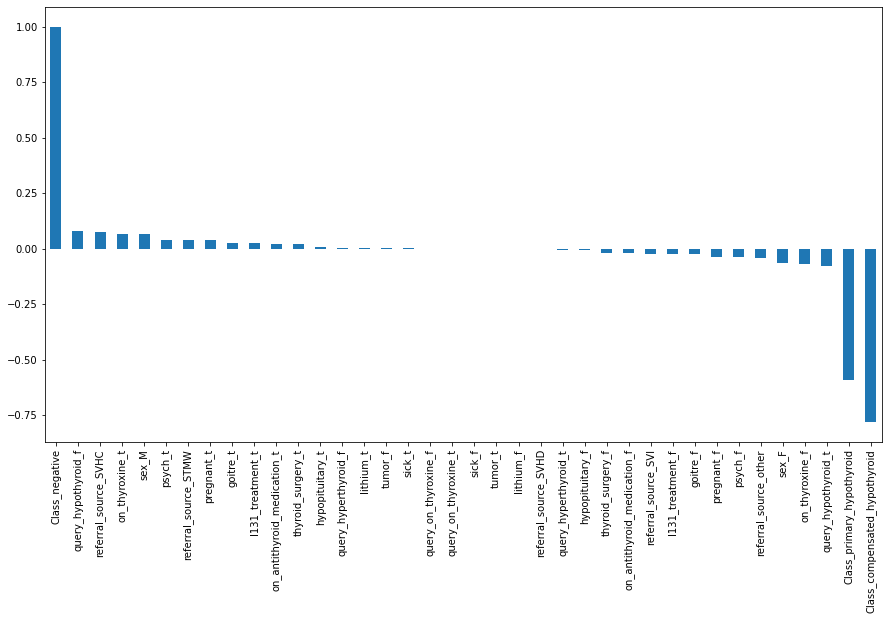

In [37]:
plt.figure(figsize=(15,8))
tdf_dummies_corr.corr()['Class_negative'].sort_values(ascending=False).plot(kind='bar')

In [38]:
# Query on Hypothyroid, Referral from SVHC, on Throxine and Male are less prone to thyroid.

sex:


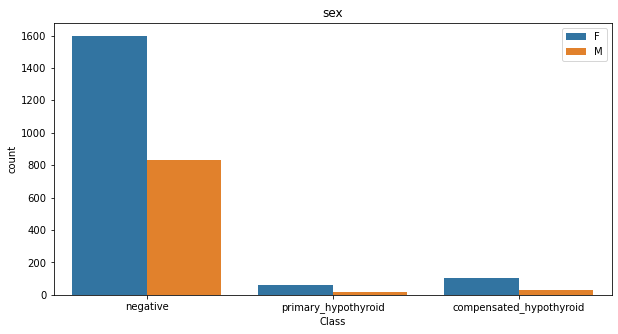

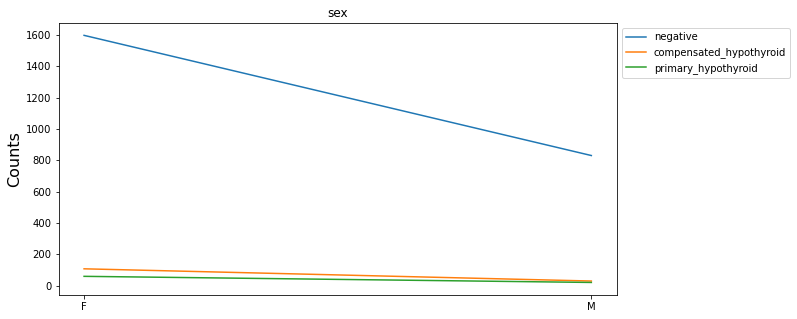

sex  p-value  0.002559000568269117  Good Predictor. There is significant relationship between the variables
on_thyroxine:


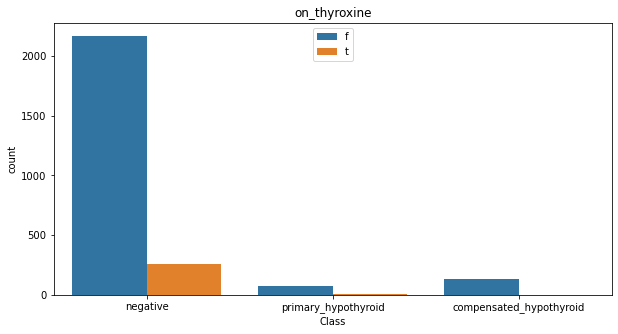

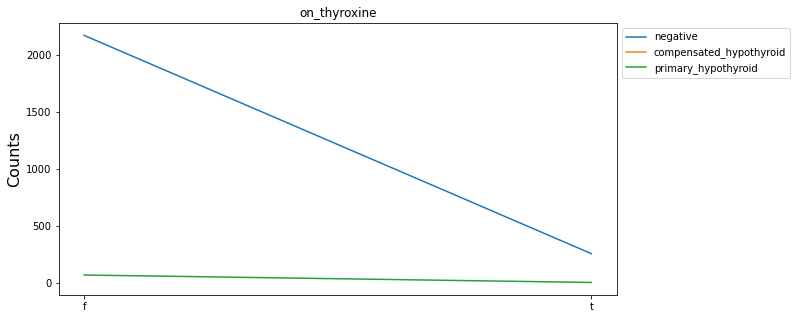

on_thyroxine  p-value  0.0002845835943214777  Good Predictor. There is significant relationship between the variables
query_on_thyroxine:


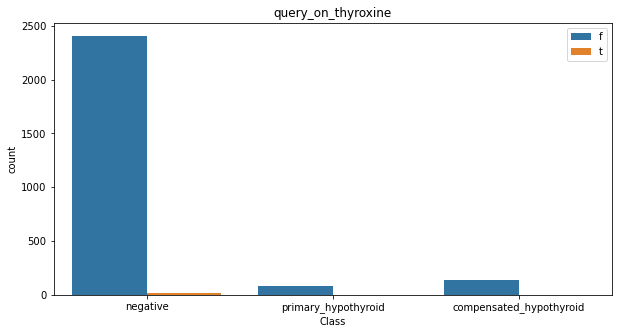

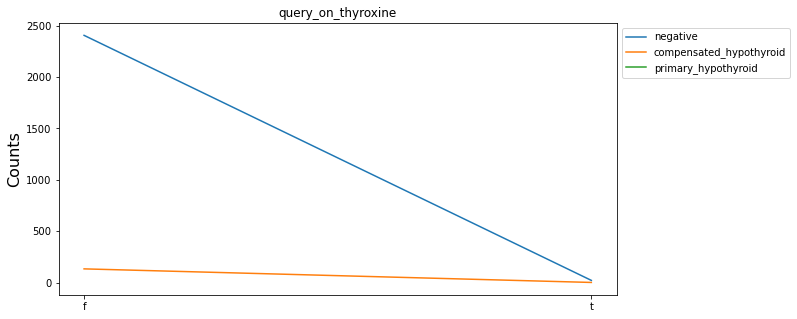

query_on_thyroxine  p-value  0.5483101655828677  Bad Predictor. There is no significant relationship between the variables
on_antithyroid_medication:


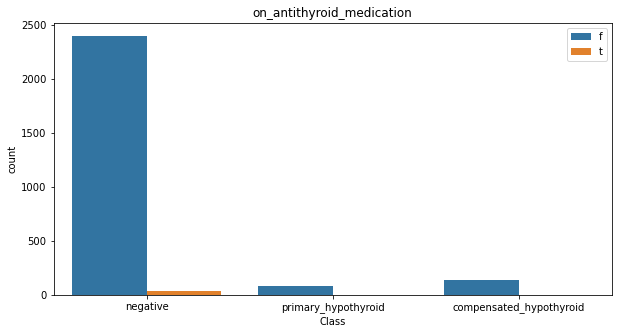

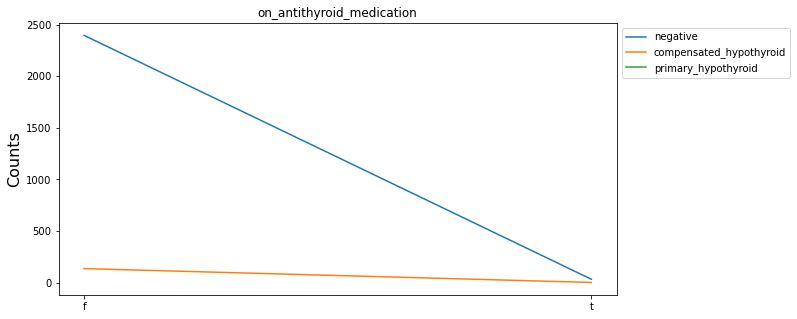

on_antithyroid_medication  p-value  0.5002840489327447  Bad Predictor. There is no significant relationship between the variables
sick:


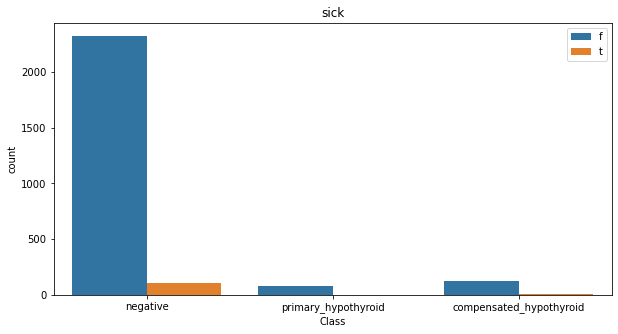

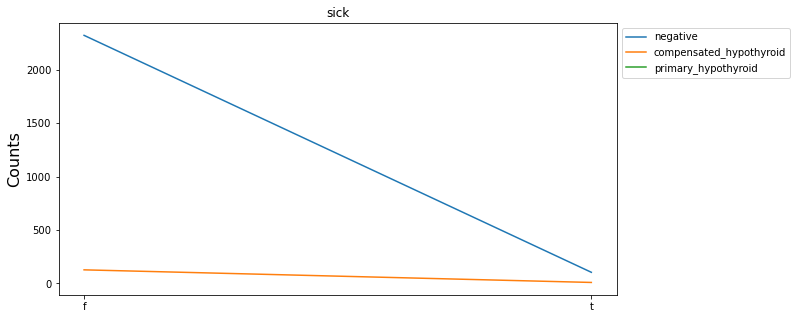

sick  p-value  0.06890517188195848  Bad Predictor. There is no significant relationship between the variables
pregnant:


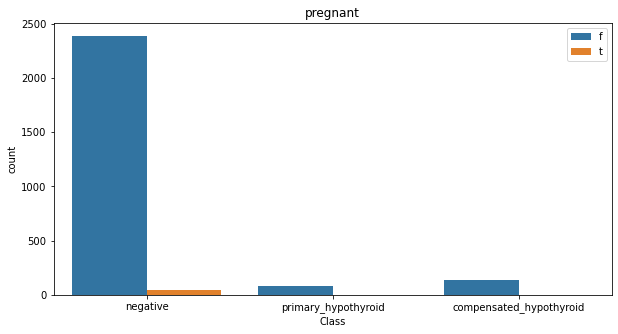

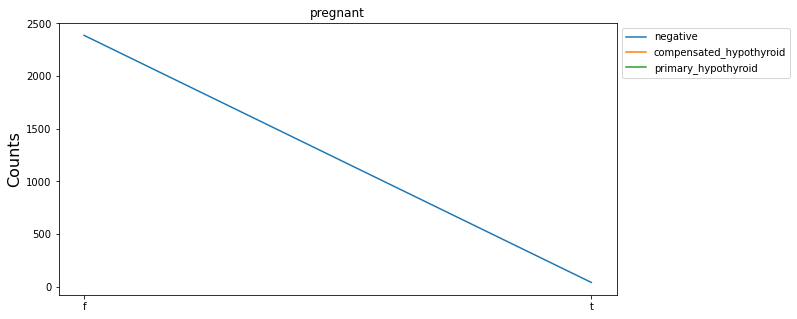

pregnant  p-value  0.15807994816373938  Bad Predictor. There is no significant relationship between the variables
thyroid_surgery:


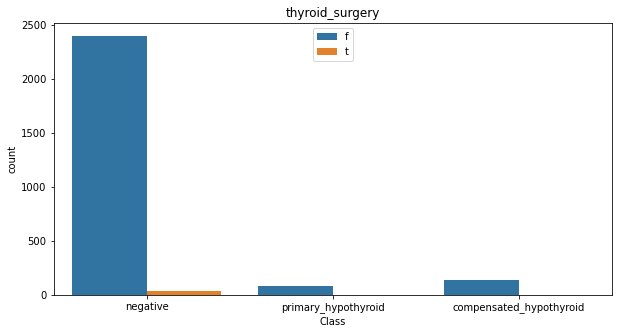

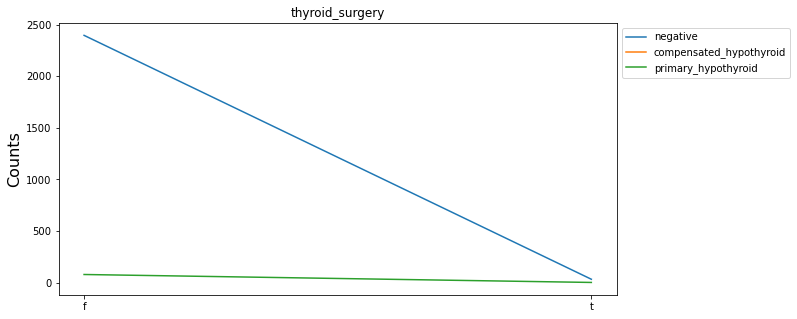

thyroid_surgery  p-value  0.40347624212861943  Bad Predictor. There is no significant relationship between the variables
I131_treatment:


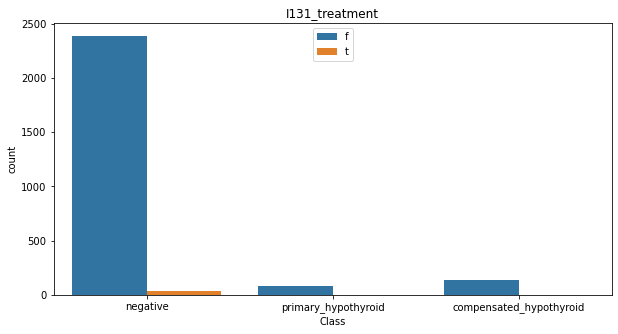

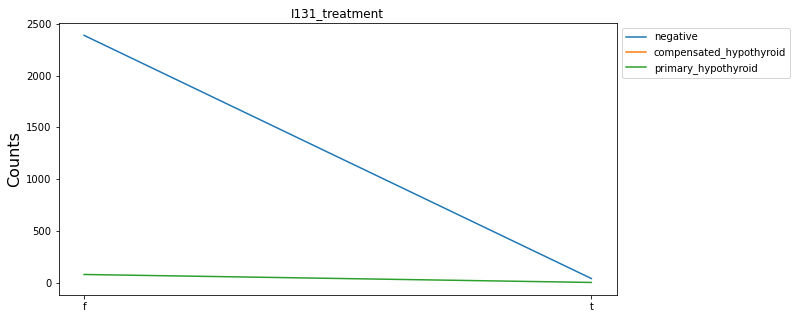

I131_treatment  p-value  0.32241017442691366  Bad Predictor. There is no significant relationship between the variables
query_hypothyroid:


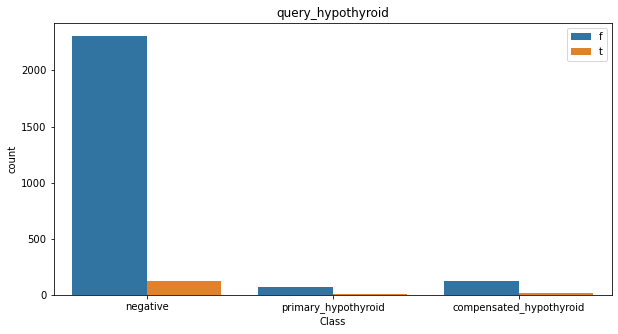

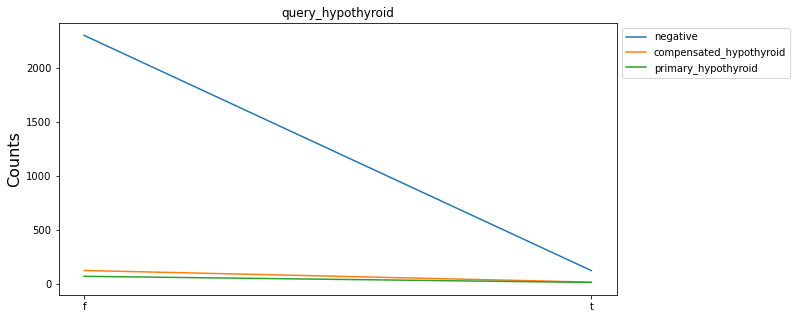

query_hypothyroid  p-value  0.00012638856458394162  Good Predictor. There is significant relationship between the variables
query_hyperthyroid:


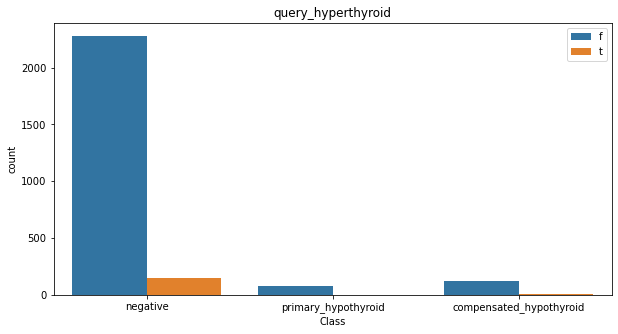

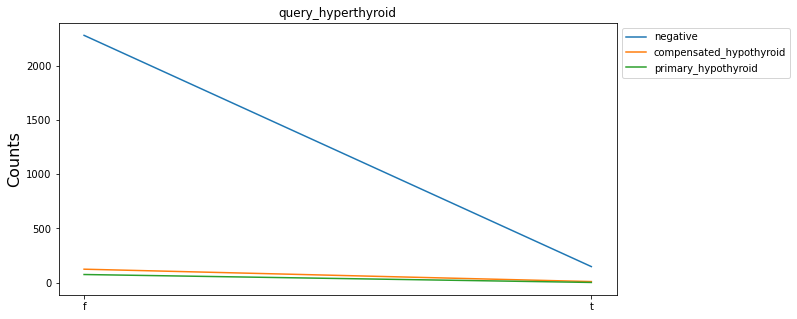

query_hyperthyroid  p-value  0.44118559432473425  Bad Predictor. There is no significant relationship between the variables
lithium:


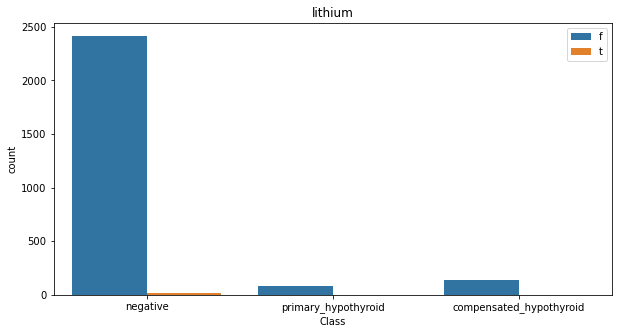

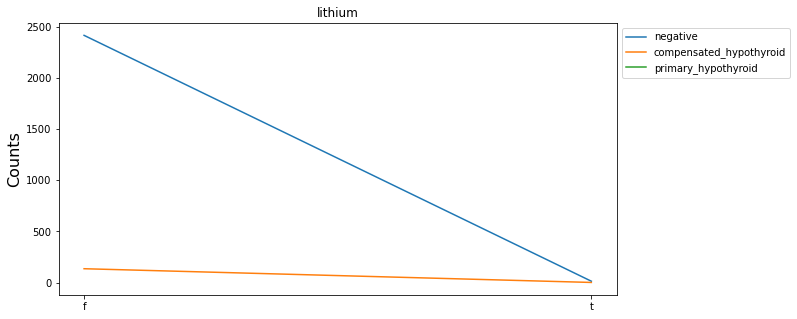

lithium  p-value  0.7667392642648186  Bad Predictor. There is no significant relationship between the variables
goitre:


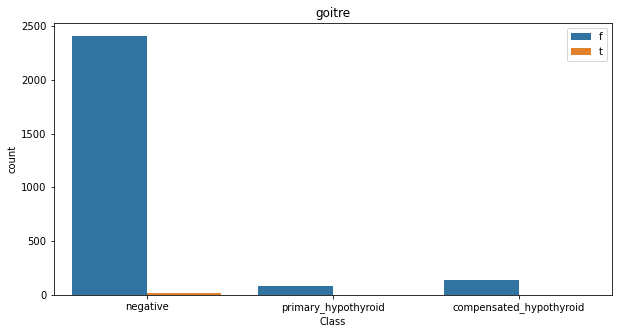

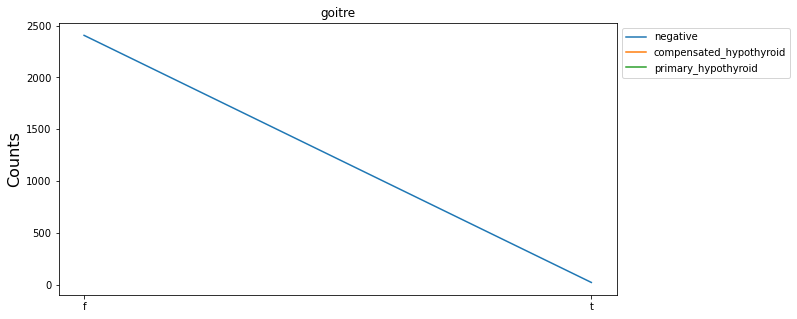

goitre  p-value  0.40957939415646727  Bad Predictor. There is no significant relationship between the variables
tumor:


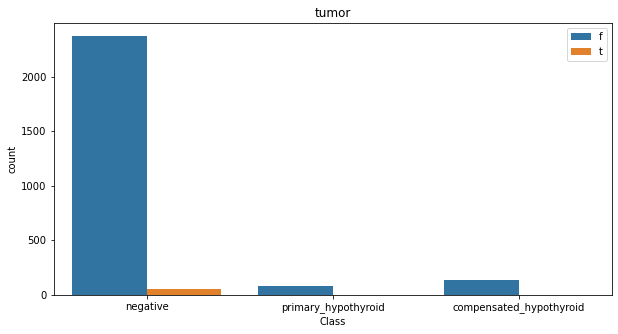

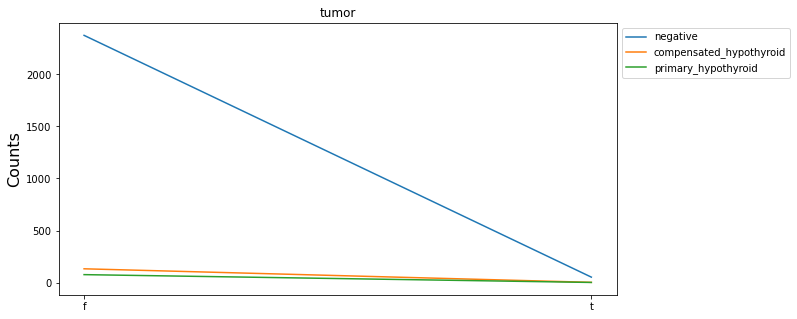

tumor  p-value  0.9786322594181877  Bad Predictor. There is no significant relationship between the variables
hypopituitary:


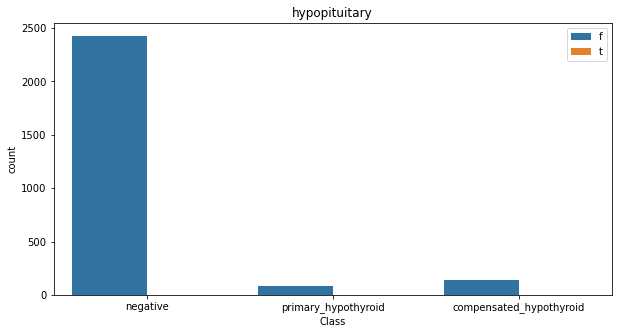

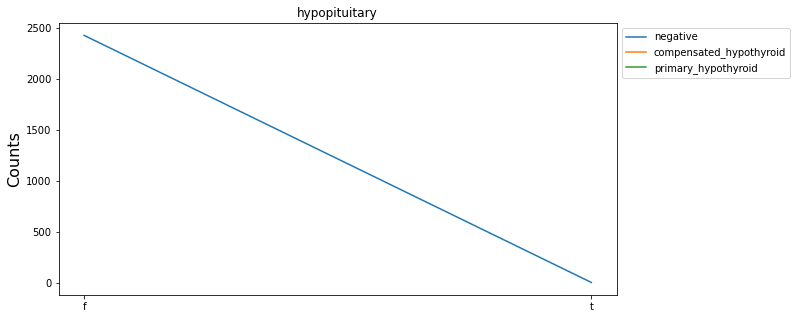

hypopituitary  p-value  0.9566572159595668  Bad Predictor. There is no significant relationship between the variables
psych:


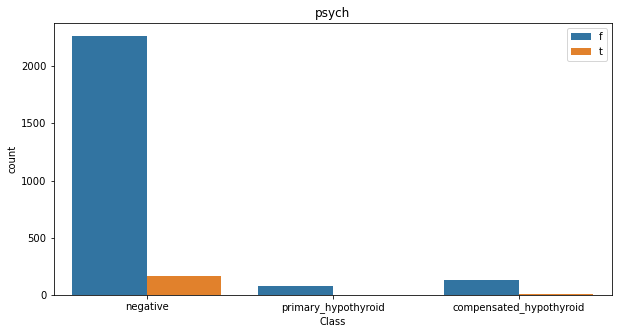

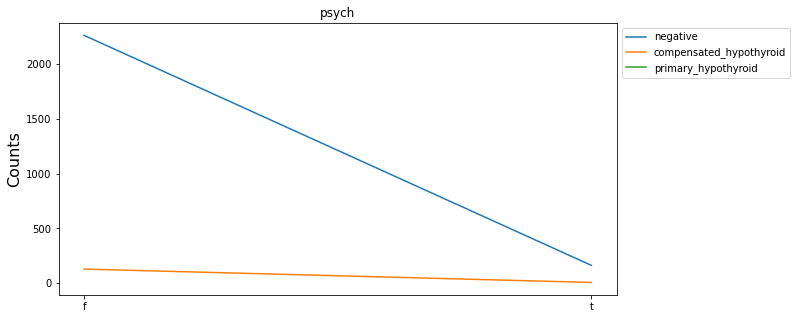

psych  p-value  0.04672545161110959  Good Predictor. There is significant relationship between the variables
referral_source:


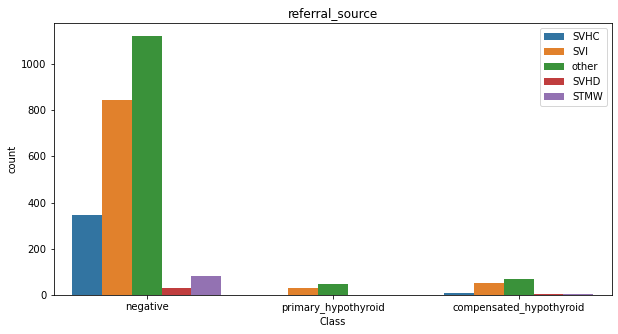

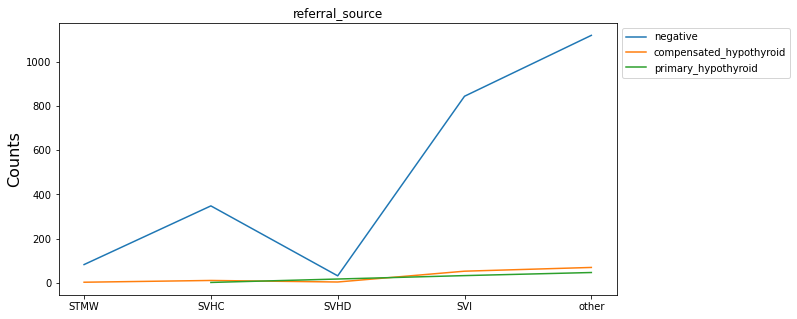

referral_source  p-value  0.002634460049492708  Good Predictor. There is significant relationship between the variables


In [39]:
for column in categorical:
    print(column+':')
    plt.figure(figsize=(10,5))
    sns.countplot(x = tdf.Class, hue= tdf[column])
    plt.title(column)
    plt.legend()
    plt.show()
    plt.figure(figsize=(10,5))
    plt.plot(tdf['Class'][tdf.Class=='negative'].groupby(tdf[column]).count())
    plt.plot(tdf['Class'][tdf.Class=='compensated_hypothyroid'].groupby(tdf[column]).count())
    plt.plot(tdf['Class'][tdf.Class=='primary_hypothyroid'].groupby(tdf[column]).count())
    plt.ylabel('Counts', size=16)
    plt.title(column)
    plt.legend(labels = ('negative', 'compensated_hypothyroid', 'primary_hypothyroid'),
           bbox_to_anchor=(1, 1), loc=2)
    plt.show()
    crstab = pd.crosstab(tdf['Class'],tdf[column])
    (stats, p, df,_) = chi2_contingency([crstab.iloc[0].values, crstab.iloc[1].values, crstab.iloc[2].values], correction=False)
    if p>0.05:
        print(column,"","p-value","",p," Bad Predictor. There is no significant relationship between the variables")
    else:
        print(column,"","p-value","",p," Good Predictor. There is significant relationship between the variables")

In [40]:
# Count of Female taking test is high. We can see there is a significant decrease in call categories of thyroid for male

# People on thyroxine are primarily not having thyroid. This is because mostly it is a regular health check-up

# Very Few people are querying on thyroxine with thryroid. It is a bad predictor

# Very Few people are querying on anti-thyroid medication with thyroid. It is a bad predictor

# Very Few people are sick with thyroid. It is a bad predictor

# Very Few people are pregnant with thyroid. It is a bad predictor

# Very Few people with thyroid surgery are having thyroid. It is a bad predictor

# Very Few people with I131 Treatment are having thyroid. It is a bad predictor

# No.people quering hypothyroid is less, where most of the people are not having thyroid

# Very Few people querying on hyperthyroid are having thyroid. It is a bad predictor

# Very Few people with Lithium are having thyroid. It is a bad predictor

# Very Few people with goitre are having thyroid. It is a bad predictor

# Very Few people with tumor are having thyroid. It is a bad predictor

# Very Few people with hypopituitory are having thyroid. It is a bad predictor

# Very Few people with psych are having thyroid. It is a bad predictor

# Other type of Referral Count is the highest. But no.of Referrral coming from SVHD is least. Among people having thyroid highest
# count is for compensated hypothyroid

In [41]:
tdf.drop(['query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary','psych'], axis=1, inplace=True)

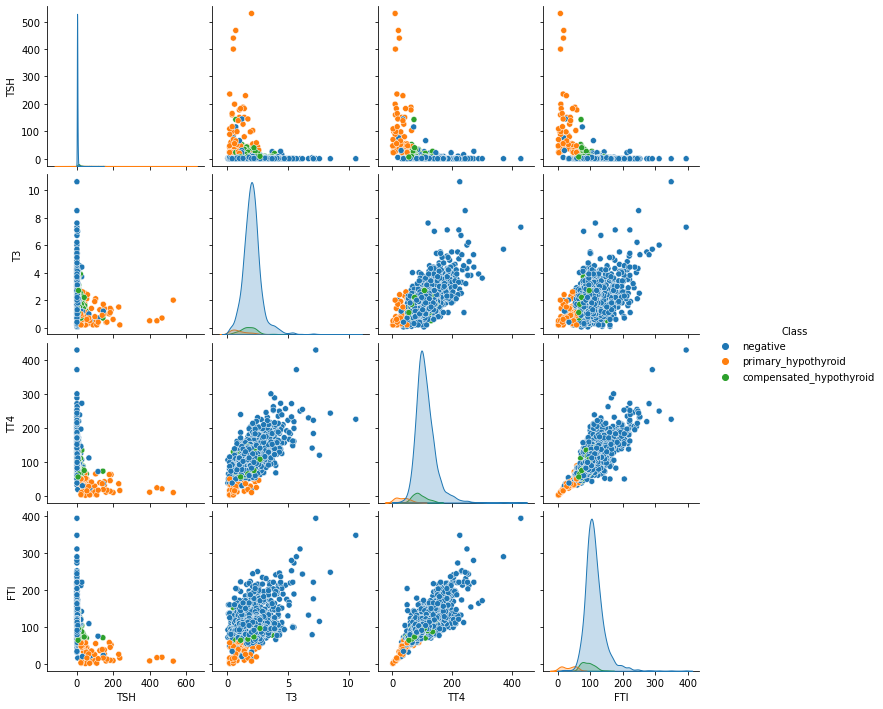

In [42]:
sns.pairplot(tdf, hue='Class')

In [ ]:
# Class is lineary seperable

In [43]:
tdf.Class.replace(['negative','compensated_hypothyroid','primary_hypothyroid', 'secondary_hypothyroid'],[0,1,2,3], inplace=True)

In [44]:
tdf.Class.value_counts()

0    2427
1     136
2      79
Name: Class, dtype: int64

In [45]:
tdf.referral_source.value_counts()

other    1236
SVI       929
SVHC      359
STMW       84
SVHD       34
Name: referral_source, dtype: int64

In [46]:
tdf_dummies = pd.get_dummies(tdf[['sex','on_thyroxine','query_hypothyroid','referral_source']], drop_first=True)

In [47]:
tdf = pd.concat([tdf,tdf_dummies], axis=1)

In [48]:
tdf.drop(['sex','on_thyroxine','query_hypothyroid','referral_source'], axis=1, inplace=True)

In [49]:
tdf.describe()

,TSH,T3,TT4,FTI,Class,sex_M,on_thyroxine_t,query_hypothyroid_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000
mean,5.036139,2.001455,107.881340,109.456886,0.111279,0.332702,0.100681,0.055261,0.135882,0.012869,0.351628,0.467827
std,23.979387,0.823820,35.448006,32.460369,0.398446,0.471270,0.300963,0.228533,0.342728,0.112731,0.477569,0.499058
min,0.005000,0.050000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,1.500000,88.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.300000,2.000000,103.000000,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.575000,2.300000,124.000000,124.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,530.000000,10.600000,430.000000,395.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2642 entries, 0 to 3771
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TSH                    2642 non-null   float32
 1   T3                     2642 non-null   float32
 2   TT4                    2642 non-null   float32
 3   FTI                    2642 non-null   float32
 4   Class                  2642 non-null   int64  
 5   sex_M                  2642 non-null   uint8  
 6   on_thyroxine_t         2642 non-null   uint8  
 7   query_hypothyroid_t    2642 non-null   uint8  
 8   referral_source_SVHC   2642 non-null   uint8  
 9   referral_source_SVHD   2642 non-null   uint8  
 10  referral_source_SVI    2642 non-null   uint8  
 11  referral_source_other  2642 non-null   uint8  
dtypes: float32(4), int64(1), uint8(7)
memory usage: 165.2 KB


In [51]:
tdf.isnull().sum()

TSH                      0
T3                       0
TT4                      0
FTI                      0
Class                    0
sex_M                    0
on_thyroxine_t           0
query_hypothyroid_t      0
referral_source_SVHC     0
referral_source_SVHD     0
referral_source_SVI      0
referral_source_other    0
dtype: int64

In [52]:
X = tdf.drop(['Class'],axis=1)
y = tdf.iloc[:, tdf.columns == 'Class']

In [53]:
X.head()

,TSH,T3,TT4,FTI,sex_M,on_thyroxine_t,query_hypothyroid_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,1.30,2.5,125.0,109.0,0,0,0,1,0,0,0
4,0.72,1.2,61.0,70.0,0,0,0,0,0,1,0
7,2.20,0.6,80.0,115.0,0,0,0,0,0,1,0
8,0.60,2.2,123.0,132.0,0,0,0,0,0,1,0
9,2.40,1.6,83.0,93.0,1,0,0,0,0,1,0


In [54]:
x = tdf.iloc[:,tdf.columns != 'Class']
y = tdf.iloc[:,tdf.columns == 'Class']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=123, shuffle=True)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [57]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123, solver='saga', multi_class='multinomial')

In [59]:
model = lr.fit(x_train, y_train.squeeze())

In [60]:
y_pred_train = model.predict(x_train)

In [61]:
y_pred_test = model.predict(x_test)

In [62]:
model.score(x_test,y_test)

0.9508196721311475

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       735
           1       0.50      0.12      0.19        34
           2       0.94      0.67      0.78        24

    accuracy                           0.95       793
   macro avg       0.80      0.59      0.65       793
weighted avg       0.94      0.95      0.94       793



In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC(random_state=123, probability=True, C=1.5)

In [67]:
model = svc.fit(x_train,y_train)

In [68]:
print(model)

SVC(C=1.5, probability=True, random_state=123)


In [69]:
y_pred= model.predict(x_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       735
           1       0.71      0.15      0.24        34
           2       1.00      0.67      0.80        24

    accuracy                           0.95       793
   macro avg       0.89      0.60      0.67       793
weighted avg       0.95      0.95      0.94       793



In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=None)
pca.fit_transform(X_train)
pca.transform(X_test)

array([[-2.0381142e+01, -9.3535862e+00, -3.4465525e+00, ...,
        -3.2711703e-02, -1.1098415e-02,  6.6201240e-03],
       [ 3.3498105e-01, -4.1102734e+00, -4.5669594e+00, ...,
        -2.5300663e-02, -2.9046610e-02,  2.0460576e-02],
       [ 1.4818401e+01, -7.9431802e-01, -4.1238875e+00, ...,
        -4.8053034e-02, -4.6911627e-02,  2.4448514e-02],
       ...,
       [ 7.1937126e+01,  1.0229767e+01,  1.4432508e+01, ...,
        -2.0926653e-01, -3.7023351e-02, -8.7662339e-03],
       [ 3.6151257e+01,  3.6812470e+00,  7.5170388e+00, ...,
        -3.9150015e-02, -3.7236139e-02,  1.3274267e-02],
       [-4.5403452e+00, -4.7149358e+00,  3.6552131e+00, ...,
        -2.4995927e-02, -3.4662485e-03, -2.4162084e-03]], dtype=float32)

In [73]:
pca.explained_variance_

array([2.2196714e+03, 5.2290503e+02, 2.4685103e+02, 5.0770289e-01,
       3.5189536e-01, 2.0432034e-01, 1.6264018e-01, 8.3008170e-02,
       4.4833325e-02, 1.6393492e-02, 5.2370867e-03], dtype=float32)

In [74]:
pca.explained_variance_ratio_

array([7.4216563e-01, 1.7483766e-01, 8.2536697e-02, 1.6975470e-04,
       1.1765915e-04, 6.8316207e-05, 5.4380103e-05, 2.7754473e-05,
       1.4990396e-05, 5.4813008e-06, 1.7510636e-06], dtype=float32)

In [75]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7421656 , 0.9170033 , 0.99954   , 0.9997097 , 0.9998274 ,
       0.9998957 , 0.99995005, 0.9999778 , 0.9999928 , 0.9999983 ,
       1.        ], dtype=float32)

In [76]:
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123, solver='saga', multi_class='multinomial')

In [78]:
model = lr.fit(X_train, y_train.squeeze())

In [79]:
y_pred_train = model.predict(X_train)

In [80]:
y_pred_test = model.predict(X_test)

In [81]:
model.score(X_test,y_test)

0.9482976040353089

In [82]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       735
           1       0.67      0.24      0.35        34
           2       0.39      1.00      0.56        24

    accuracy                           0.95       793
   macro avg       0.69      0.74      0.63       793
weighted avg       0.97      0.95      0.95       793



In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)

In [84]:
x_sm,y_sm =smote.fit_resample(x,y)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_sm, y_sm, test_size=0.3, random_state=123, shuffle=True)

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [87]:
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123, solver='saga', multi_class='multinomial')

In [89]:
model = lr.fit(x_train, y_train.squeeze())

In [90]:
y_pred_train = model.predict(x_train)

In [91]:
y_pred_test = model.predict(x_test)

In [92]:
model.score(x_test,y_test)

0.9688787185354691

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       745
           1       0.97      0.94      0.96       722
           2       0.99      1.00      0.99       718

    accuracy                           0.97      2185
   macro avg       0.97      0.97      0.97      2185
weighted avg       0.97      0.97      0.97      2185



In [101]:
from sklearn.preprocessing import PowerTransformer

In [102]:
pt= PowerTransformer(method='yeo-johnson')

In [103]:
x_train = pt.fit_transform(X_train)
x_test = pt.transform(X_test)

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123, solver='saga', multi_class='multinomial')

In [105]:
model = lr.fit(x_train, y_train.squeeze())

In [106]:
y_pred_train = model.predict(x_train)

In [107]:
y_pred_test = model.predict(x_test)

In [108]:
model.score(x_test,y_test)

0.9871853546910755

In [109]:
from sklearn.metrics import classification_report

In [110]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       745
           1       0.98      0.99      0.98       722
           2       0.99      1.00      0.99       718

    accuracy                           0.99      2185
   macro avg       0.99      0.99      0.99      2185
weighted avg       0.99      0.99      0.99      2185

